# ОИАД. Лабораторная работа №3

https://www.kaggle.com/datasets/mosapabdelghany/medical-insurance-cost-dataset?resource=download

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [5]:
train_data = pd.read_csv('insurance_train.csv')
test_data = pd.read_csv('insurance_test.csv')
print("Train:")
print('Train shape:', train_data.shape)
display(train_data.head())
print("Test:")
print('Test shape:', test_data.shape)
display(test_data.head())

Train:
Train shape: (338, 7)


,age,sex,bmi,children,smoker,region,charges
0,26,male,27.060,0,yes,southeast,17043.34140
1,58,male,36.955,2,yes,northwest,47496.49445
2,20,female,24.420,0,yes,southeast,26125.67477
3,51,female,38.060,0,yes,southeast,44400.40640
4,62,female,25.000,0,no,southwest,13451.12200


Test:
Test shape: (1000, 7)


,age,sex,bmi,children,smoker,region,charges
0,61,male,38.380,0,no,northwest,12950.07120
1,59,female,34.800,2,no,southwest,36910.60803
2,31,male,30.875,0,no,northeast,3857.75925
3,24,female,33.345,0,no,northwest,2855.43755
4,31,male,28.500,5,no,northeast,6799.45800


## 1. Подготовка данных

#### 1. проверить наличие пропусков и выбросов

In [9]:
print("Пропуски train:")
print(train_data.isnull().sum())

Пропуски train:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [11]:
print("Пропуски test:")
print(test_data.isnull().sum())

Пропуски test:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [13]:
num_cols = train_data.select_dtypes(include=[np.number])
Q1 = num_cols.quantile(0.25)
Q3 = num_cols.quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((num_cols < (Q1 - 1.5 * IQR)) | (num_cols > (Q3 + 1.5 * IQR)))

print("Количество выбросов по IQR в train_data:")
print(outliers_iqr.sum())

Количество выбросов по IQR в train_data:
age          0
bmi          5
children     0
charges     19
dtype: int64


In [15]:
z_scores = np.abs(stats.zscore(train_data.select_dtypes(include=[np.number])))
outliers_z = (z_scores > 3)
print("\nКоличество выбросов по Z-score в train_data:")
print(outliers_z.sum(axis=0))


Количество выбросов по Z-score в train_data:
age         0
bmi         1
children    5
charges     3
dtype: int64


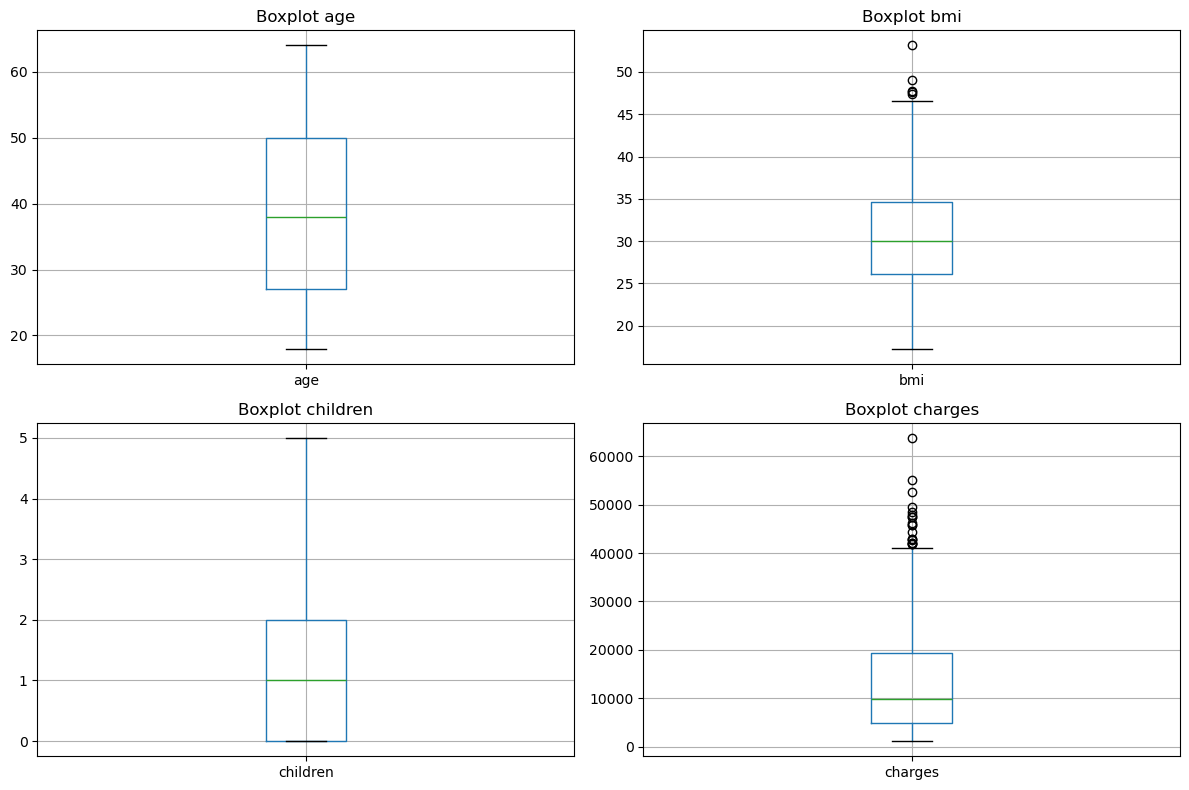

In [17]:
numeric_columns = ['age', 'bmi', 'children', 'charges']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for i, col in enumerate(numeric_columns):
    row, col_idx = i // 2, i % 2
    train_data.boxplot(column=col, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

#### 2. привести категориальные признаки к числовым

In [20]:
categorical_cols = ['sex', 'smoker', 'region']
train_processed = pd.get_dummies(train_data, columns=categorical_cols, drop_first=True, dtype=float)
test_processed = pd.get_dummies(test_data, columns=categorical_cols, drop_first=True, dtype=float)
test_processed = test_processed.reindex(columns=train_processed.columns, fill_value=0)

print("\nРазмер train:", train_processed.shape)
print("Размер test: ", test_processed.shape)
display(train_processed.head())


Размер train: (338, 9)
Размер test:  (1000, 9)


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,26,27.060,0,17043.34140,1.0,1.0,0.0,1.0,0.0
1,58,36.955,2,47496.49445,1.0,1.0,1.0,0.0,0.0
2,20,24.420,0,26125.67477,0.0,1.0,0.0,1.0,0.0
3,51,38.060,0,44400.40640,0.0,1.0,0.0,1.0,0.0
4,62,25.000,0,13451.12200,0.0,0.0,0.0,0.0,1.0


### 3. вычислить парные корреляции признаков

Матрица парных корреляций:


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.079096,5.392529e-02,0.298395,-0.046393,1.019429e-02,-0.069440,-0.050969,0.074101
bmi,0.079096,1.000000,6.306955e-02,0.219566,0.037125,4.963140e-02,-0.190355,0.347719,-0.015443
children,0.053925,0.063070,1.000000e+00,0.069444,-0.005297,-2.329919e-17,-0.024903,0.023059,0.019468
charges,0.298395,0.219566,6.944380e-02,1.000000,0.060221,7.835189e-01,-0.032287,0.009792,-0.053905
sex_male,-0.046393,0.037125,-5.297014e-03,0.060221,1.000000,1.178561e-01,-0.037018,0.011451,-0.036513
smoker_yes,0.010194,0.049631,-2.329919e-17,0.783519,0.117856,1.000000e+00,-0.007625,-0.008237,-0.059517
region_northwest,-0.069440,-0.190355,-2.490291e-02,-0.032287,-0.037018,-7.624929e-03,1.000000,-0.366083,-0.299910
region_southeast,-0.050969,0.347719,2.305945e-02,0.009792,0.011451,-8.237233e-03,-0.366083,1.000000,-0.354079
region_southwest,0.074101,-0.015443,1.946830e-02,-0.053905,-0.036513,-5.951683e-02,-0.299910,-0.354079,1.000000


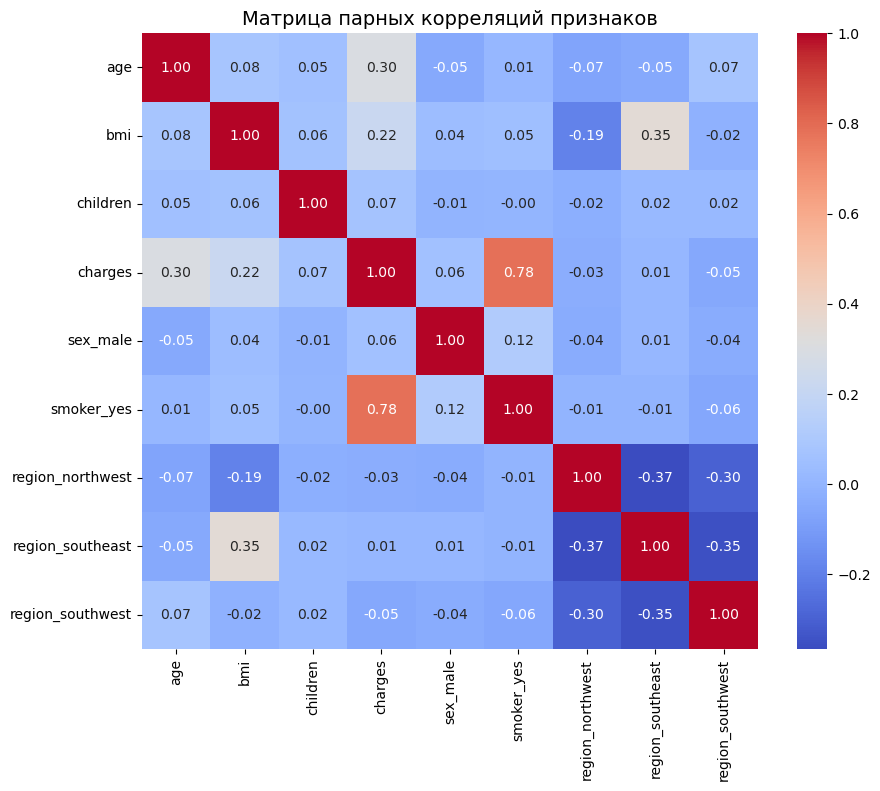

In [23]:
corr_matrix = train_processed.corr()
print("Матрица парных корреляций:")
display(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Матрица парных корреляций признаков", fontsize=14)
plt.show()

In [25]:
print("\nКорреляция с charges:")
correlation_with_target = corr_matrix['charges'].sort_values(ascending=False)
print(correlation_with_target)


Корреляция с charges:
charges             1.000000
smoker_yes          0.783519
age                 0.298395
bmi                 0.219566
children            0.069444
sex_male            0.060221
region_southeast    0.009792
region_northwest   -0.032287
region_southwest   -0.053905
Name: charges, dtype: float64


## 2. Многомерная линейная регрессия
Построить модель линейной регрессии и подобрать параметры

In [28]:
train_labels = train_processed['charges']
test_labels = test_processed['charges']
train_features = train_processed.drop('charges', axis=1)
test_features = test_processed.drop('charges', axis=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_features)
X_test_scaled = scaler.transform(test_features)
X_train_b = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_b = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]
y_train = train_labels.values
y_test = test_labels.values

### 1. аналитически (реализовать самому)

In [31]:
def analytical_solution(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y
w_optimal = analytical_solution(X_train_b, y_train)

print(f"\nОптимальные веса модели:")
print(f"Intercept (w0): {w_optimal[0]:.6f}")
for i, col in enumerate(train_features.columns):
    print(f"{col}: {w_optimal[i+1]:.6f}")


Оптимальные веса модели:
Intercept (w0): 14092.861924
age: 3495.769492
bmi: 2210.571768
children: 581.675135
sex_male: -327.421295
smoker_yes: 9859.845555
region_northwest: -85.259131
region_southeast: -638.001366
region_southwest: -601.390128


### 2. численно, с помощью методов градиентного спуска (реализовать самому)

In [34]:
def gradient_descent(X, y, learning_rate, n_iterations):
    m, n = X.shape
    weights = np.zeros(n)
    cost_history = []
    for i in range(n_iterations):
        prediction = X.dot(weights)
        error = prediction - y
        gradient = (1/m) * X.T.dot(error)
        weights = weights - learning_rate * gradient
        
        cost = (1/(2*m)) * np.sum(error**2)
        cost_history.append(cost) 
    return weights, cost_history

learning_rate = 0.001
n_iterations = 20000

weights_gd, cost_history = gradient_descent(X_train_b, y_train, learning_rate, n_iterations)

print("ВЕСА МОДЕЛИ (Градиентный спуск):")
print(f"Intercept (w0): {weights_gd[0]:.6f}")
for i, col_name in enumerate(train_features.columns):
    print(f"{col_name}: {weights_gd[i+1]:.6f}")

ВЕСА МОДЕЛИ (Градиентный спуск):
Intercept (w0): 14092.861895
age: 3495.826637
bmi: 2210.414216
children: 581.669591
sex_male: -327.377608
smoker_yes: 9859.901694
region_northwest: -84.785563
region_southeast: -637.426433
region_southwest: -600.901031


## 3. Добавление регуляризации
Модифицировать линейную модель путем добавления регуляризационного слагаемого. Найти оптимальные веса:

### 1. аналитически

In [38]:
def analytical_ridge_solution(X, y, lambda_):
    m, n = X.shape
    I = np.identity(n)
    I[0, 0] = 0
    term_to_invert = X.T.dot(X) + lambda_ * I
    weights = np.linalg.inv(term_to_invert).dot(X.T).dot(y)
    return weights
l_lamb = 100
weights_ridge_analytical = analytical_ridge_solution(X_train_b, y_train, l_lamb)
print("Веса:")
for i, col_name in enumerate(train_features.columns):
    print(f"{col_name}: {weights_ridge_analytical[i+1]:.6f}")

Веса:
age: 2758.253096
bmi: 1765.787141
children: 495.510974
sex_male: -59.980940
smoker_yes: 7616.364964
region_northwest: -64.943278
region_southeast: -368.060724
region_southwest: -442.962883


### 2. численно

In [41]:
def grad_desc_l(X, y, learning_rate=0.01, n_iterations=1000, l_lamb=1.0):
    m, n = X.shape
    weights = np.zeros(n)
    cost_history = []
    for i in range(n_iterations):
        prediction = X.dot(weights)
        error = prediction - y
        gradient = (1/m) * X.T.dot(error)
        weights_for_reg = weights.copy()
        weights_for_reg[0] = 0
        gradient += (l_lamb/m) * weights_for_reg
        weights = weights - learning_rate * gradient
        mse_cost = (1/(2*m)) * np.sum(error**2)
        reg_cost = (l_lamb/(2*m)) * np.sum(weights_for_reg**2)
        total_cost = mse_cost + reg_cost
        cost_history.append(total_cost)
    return weights, cost_history

weights_ridge_gd, cost_history_ridge = grad_desc_l(X_train_b, y_train, learning_rate=learning_rate, n_iterations=n_iterations, l_lamb=l_lamb)
print("Веса:")
for i, col_name in enumerate(train_features.columns):
    print(f"{col_name}: {weights_ridge_gd[i+1]:.6f}")

Веса:
age: 2758.253173
bmi: 1765.786929
children: 495.510967
sex_male: -59.980882
smoker_yes: 7616.365039
region_northwest: -64.942641
region_southeast: -368.059951
region_southwest: -442.962226


### 4. Оценка обобщающей способности
Сравнить между собой модели на тестовых данных по среднему квадрату ошибки:
1. константную - прогноз средним значением
2. из пункта 2
3. из пункта 3

In [44]:
from sklearn.metrics import mean_squared_error
results = {}
mean_charge = y_train.mean()
y_pred_const = np.full_like(y_test, fill_value=mean_charge)
mse_const = mean_squared_error(y_test, y_pred_const)
results['Константная модель'] = mse_const
y_pred_linear = X_test_b.dot(w_optimal)
mse_linear = mean_squared_error(y_test, y_pred_linear)
results['Линейная регрессия'] = mse_linear
y_pred_ridge = X_test_b.dot(weights_ridge_analytical)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
results['Регрессия L2'] = mse_ridge
results_df = pd.DataFrame(list(results.items()), columns=['Модель', 'MSE на тестовых данных'])
display(results_df)

,Модель,MSE на тестовых данных
0,Константная модель,1.418301e+08
1,Линейная регрессия,3.421601e+07
2,Регрессия L2,4.024463e+07
